In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 as cv
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blackgram/BLACKGRAM-lower.png
/kaggle/input/wheat-lower/WHEAT-lower.png


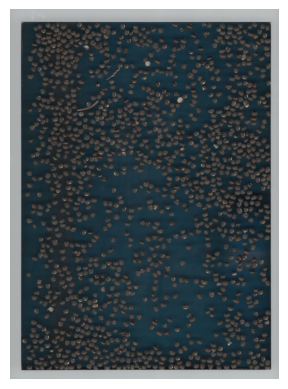

In [2]:
# Read the image
image = cv.imread('/kaggle/input/blackgram/BLACKGRAM-lower.png')

# Check if the image is successfully loaded
if image is not None:
    # Display the image using matplotlib
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [13]:
!pip install opencv-python
!pip install matplotlib


In [14]:
image = cv.imread('/kaggle/input/blackgram/BLACKGRAM-lower.png')

cv.imshow('test blackgram',image)

cv.waitkey()

cv.destroyAllWindows()

error: OpenCV(4.8.1) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


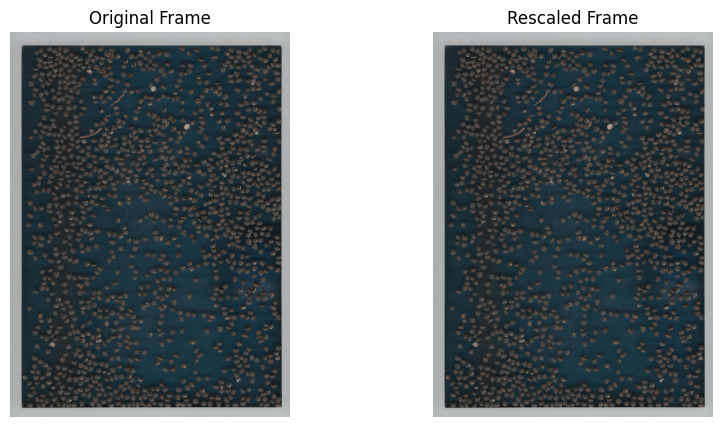

In [3]:
def rescaleFrame(frame, scale=0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width, height)
    
    # Resize the frame
    rescaled_frame = cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)
    
    return rescaled_frame

# Read an image or video frame
frame = cv.imread('/kaggle/input/blackgram/BLACKGRAM-lower.png')  # replace with your image path

# Call the rescaleFrame function
rescaled_frame = rescaleFrame(frame, scale=0.5)

# Display the original and rescaled frames using matplotlib
plt.figure(figsize=(10, 5))

# Original Frame
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
plt.title('Original Frame')
plt.axis('off')

# Rescaled Frame
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(rescaled_frame, cv.COLOR_BGR2RGB))
plt.title('Rescaled Frame')
plt.axis('off')

plt.show()


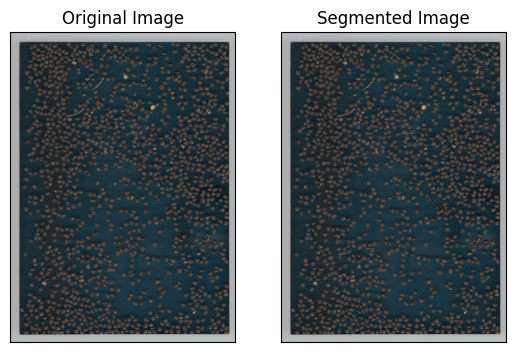

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv.imread('/kaggle/input/blackgram/BLACKGRAM-lower.png')

# Check if the image is successfully loaded 
assert img is not None, "File could not be read, check with os.path.exists()"

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Applies a median blur to the image to reduce noise.
gray = cv.medianBlur(gray, 5)

# Performs background removal by applying a binary threshold to the grayscale image.
# Assumes the background is white (values greater than 240 become 0, and values less than or equal to 240 become 255).
ret, thresh = cv.threshold(gray, 240, 255, cv.THRESH_BINARY_INV)

# Find contours in the binary image
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create an empty mask
mask = np.zeros_like(gray)

# Draw contours on the mask (filling them with white color)
cv.drawContours(mask, contours, -1, (255), thickness=cv.FILLED)

# Use the mask to segment the original image
segmented_image = cv.bitwise_and(img, img, mask=mask)

# Display the original and segmented images side by side
plt.subplot(1, 2, 1), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(cv.cvtColor(segmented_image, cv.COLOR_BGR2RGB))
plt.title('Segmented Image'), plt.xticks([]), plt.yticks([])

plt.show()

 

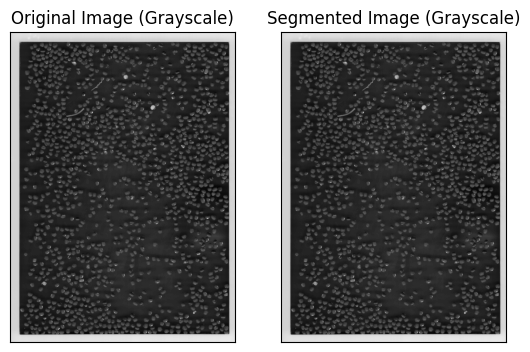

In [5]:
# Read the image in grayscale
img = cv.imread('/kaggle/input/blackgram/BLACKGRAM-lower.png', cv.IMREAD_GRAYSCALE)

# Check if the image is successfully loaded
assert img is not None, "File could not be read, check with os.path.exists()"

# Apply a median blur to reduce noise
img = cv.medianBlur(img, 5)

# Perform background removal (assuming the background is white)
ret, thresh = cv.threshold(img, 240, 255, cv.THRESH_BINARY_INV)

# Find contours of the objects in the image
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create a mask to store the segmented image
mask = np.zeros_like(img)

# Draw contours on the mask
cv.drawContours(mask, contours, -1, (255), thickness=cv.FILLED)

# Bitwise AND operation to segment the original image
segmented_image = cv.bitwise_and(img, img, mask=mask)

# Display the original and segmented images
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image (Grayscale)'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Grayscale)'), plt.xticks([]), plt.yticks([])

plt.show()


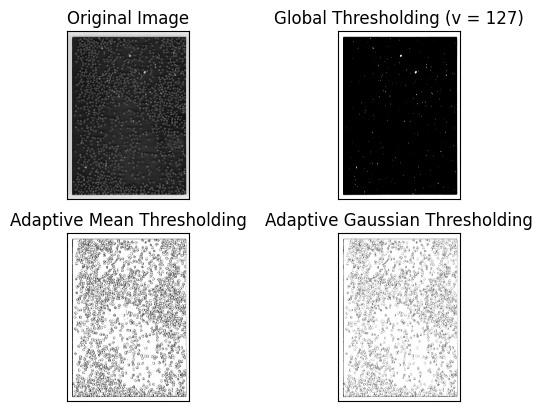

In [6]:
img = cv.imread('/kaggle/input/blackgram/BLACKGRAM-lower.png', cv.IMREAD_GRAYSCALE)

#The assert statement checks if the image is successfully loaded; 
#otherwise, it raises an assertion error with the given message.

assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)

#cv.threshold: Global thresholding using a fixed threshold value (127 in this case).
#cv.adaptiveThreshold: Adaptive thresholding based on the mean of the neighborhood 
#a weighted sum of the neighborhood values.

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)', #Creates a 2x2 subplot grid for displaying images.
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

#Uses matplotlib.pyplot to show the original image and images after different thresholding techniques.
#The titles list contains titles for each subplot.
#The plt.subplot and plt.imshow functions are used to arrange and display the images.
#plt.show() is called to display the plot.

images = [img, th1, th2, th3] 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


# #**WHEAT Image Segmentation.**

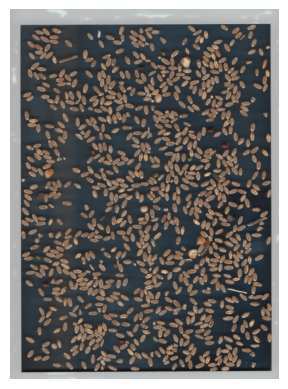

In [7]:
image=cv.imread('/kaggle/input/wheat-lower/WHEAT-lower.png')

if image is not None:
    plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## RESCALE FRAME


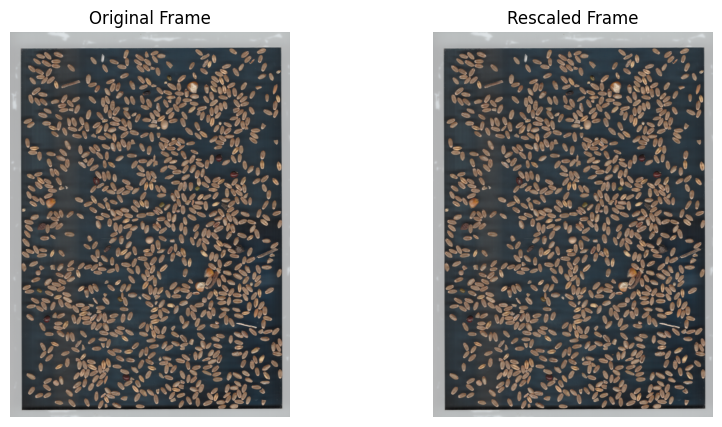

In [8]:
def rescaleFrame(frame,scale=0.75):
    width= int(frame.shape[1]*scale)
    height=int(frame.shape[0]*scale)
    dimensions =(width,height)
    rescaled_frame=cv.resize(frame,dimensions,interpolation=cv.INTER_AREA)
    return rescaled_frame
frame = cv.imread('/kaggle/input/wheat-lower/WHEAT-lower.png')
rescaled_frame = rescaleFrame(frame,scale=0.5)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(frame,cv.COLOR_BGR2RGB))
plt.title('Original Frame')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(rescaled_frame,cv.COLOR_BGR2RGB))
plt.title('Rescaled Frame')
plt.axis('off')

plt.show()

## SEGMENTED IMAGE

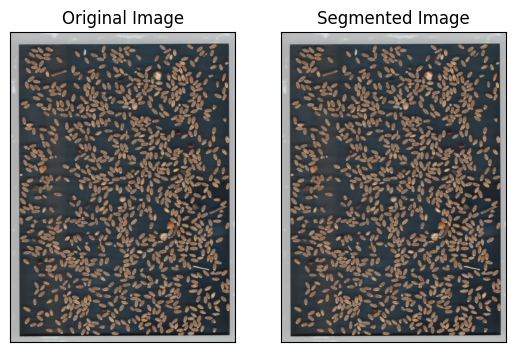

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('/kaggle/input/wheat-lower/WHEAT-lower.png')
assert image is not None, "File could not be read, check with os.path.exists()" 

img = cv.medianBlur(image, 7)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, thresh = cv.threshold(gray, 240, 255, cv.THRESH_BINARY_INV)

contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

mask = np.zeros_like(gray)

cv.drawContours(mask, contours, -1, (255), thickness=cv.FILLED)

segmented_image = cv.bitwise_and(img, img, mask=mask)

plt.subplot(1, 2, 1), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(cv.cvtColor(segmented_image, cv.COLOR_BGR2RGB))
plt.title('Segmented Image'), plt.xticks([]), plt.yticks([])

plt.show()




## THRESHOLD

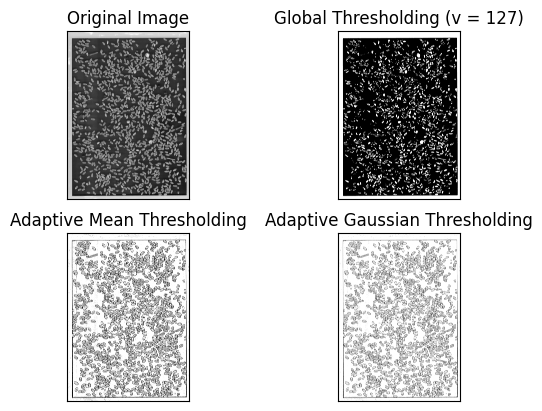

In [10]:

# Read the image in grayscale
img = cv.imread('/kaggle/input/wheat-lower/WHEAT-lower.png', cv.IMREAD_GRAYSCALE)

# Check if the image is successfully loaded
assert img is not None, "File could not be read, check with os.path.exists()"

# Apply median blur to reduce noise
img = cv.medianBlur(img, 5)

# Global thresholding using a fixed threshold value (127 in this case)
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Adaptive mean thresholding
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                            cv.THRESH_BINARY, 11, 2)

# Adaptive Gaussian thresholding
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv.THRESH_BINARY, 11, 2)

# Define titles for each subplot
titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

# Create a 2x2 subplot grid for displaying images
# Use matplotlib.pyplot to show the original image and images after different thresholding techniques
# The plt.subplot and plt.imshow functions are used to arrange and display the images
# plt.show() is called to display the plot
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()
